In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score, KFold
from numpy import absolute
import pandas as pd

In [2]:
%store -r df

In [3]:
Y = df.Price
X = df.drop(['Price'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
cross_val = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

In [6]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree')
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
scores = cross_val_score(model, X, Y, cv=cross_val, n_jobs=-1)

In [8]:
scores

array([0.75972136, 0.73637809, 0.74510055, 0.72048213, 0.73883636,
       0.7557652 , 0.76817309, 0.73115909, 0.74680952, 0.76165805,
       0.72970971, 0.72994657, 0.7532034 , 0.75201068, 0.72836587,
       0.77068933, 0.75665044, 0.75180889, 0.7678489 , 0.73624546,
       0.72108268, 0.74779143, 0.74606626, 0.76233047, 0.75683895,
       0.75787028, 0.72387466, 0.7576071 , 0.75146743, 0.75028592,
       0.75645252, 0.74004753, 0.74537146, 0.73828535, 0.75643481,
       0.75955964, 0.74727442, 0.73094493, 0.74734422, 0.76784928,
       0.74613391, 0.74084244, 0.75026224, 0.76583418, 0.74966226,
       0.76037744, 0.76350689, 0.73382051, 0.75188014, 0.69873183])

In [9]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.747 (0.015)


In [10]:
f_importance=model.get_booster().get_score(importance_type='gain')

In [11]:
importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

<AxesSubplot:>

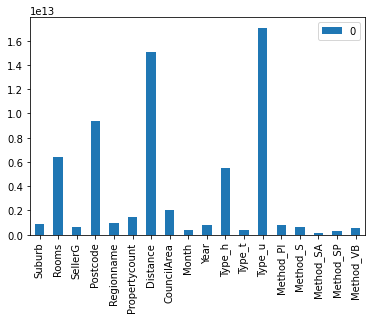

In [12]:
importance_df.plot.bar()